In [121]:
## -------------------------------- ##
##     IMPORT THE STUFF YOU NEED    ##
## -------------------------------- ##
import sys
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
#from scipy.stats import binomtest
from matplotlib import colors 
import matplotlib.colors as mplc # for log-scale colour bars
import importlib
## -------------------------------- ##
##      SET LZ PLOTTING STYLE       ##
## -------------------------------- ##
# Set Path to LZStyle file:
if None != os.getenv('NERSC_HOST'):
    import matplotlib.font_manager as font_manager
    font_manager.fontManager.addfont('/global/cfs/cdirs/lz/physics/WS/SR1/msttcorefonts/Times_New_Roman.ttf')
plt.style.use('/home/harvey-birch/Documents/LZ/LZStyle/SetLZStyle.mplstyle')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
import matplotlib.ticker as ticker
import glob
import pandas as pd
import statistics

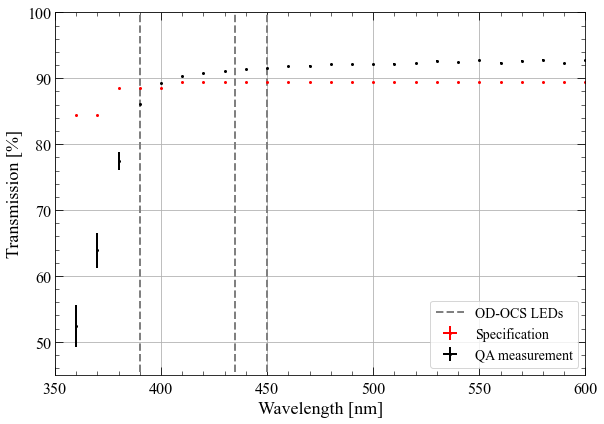

In [141]:
sheet=pd.read_excel('T187-XDM-UVT_WAVELENGHT_08252017.xlsx') #Read the Excel file
n=27 #Number of columns to consider for the spectrum
Spec=np.array(sheet.iloc[0].to_list()[2:n]) #Specification data
wavelength=np.array(sheet.iloc[1].to_list()[2:n]) #Wavelengths
Average=np.array(sheet.iloc[51].to_list()[2:n]) #Average Tranmission for a given wavelength
stdDev=np.array(sheet.iloc[52].to_list()[2:n]) #Standard deviation of Average transmission for a given wavelength 
EOM=[] #Error on average transmission
for i in range(len(stdDev)):
    EOM.append(stdDev[i]/np.sqrt(len(stdDev)))
#Create a plot with error bars for the specification and QA measurement data

fig, ax = plt.subplots()
x_val=wavelength
ax.errorbar(x_val,Spec,xerr=0,yerr=0,label="Specification",c="red",linestyle="",marker='.', markersize=4)
ax.errorbar(x_val,Average,xerr=0,yerr=EOM,label="QA measurement",c="k",linestyle="",marker='.', markersize=4)
ax.set(xlim=(350,600),ylim=(45,100),xlabel="Wavelength [nm]",ylabel="Transmission [%]")
ax.vlines(x=390, ymin=0, ymax=100, color='grey', linestyle='--',label="OD-OCS LEDs")
ax.vlines(x=435, ymin=0, ymax=100, color='grey', linestyle='--')
ax.vlines(x=450, ymin=0, ymax=100, color='grey', linestyle='--')
ax.legend(loc='lower right',fontsize=14)
ax.grid()
fig.tight_layout()
fig.savefig('T187-XDM-UVT_WAVELENGHT_08252017.png', dpi=300,facecolor='w', edgecolor='w')